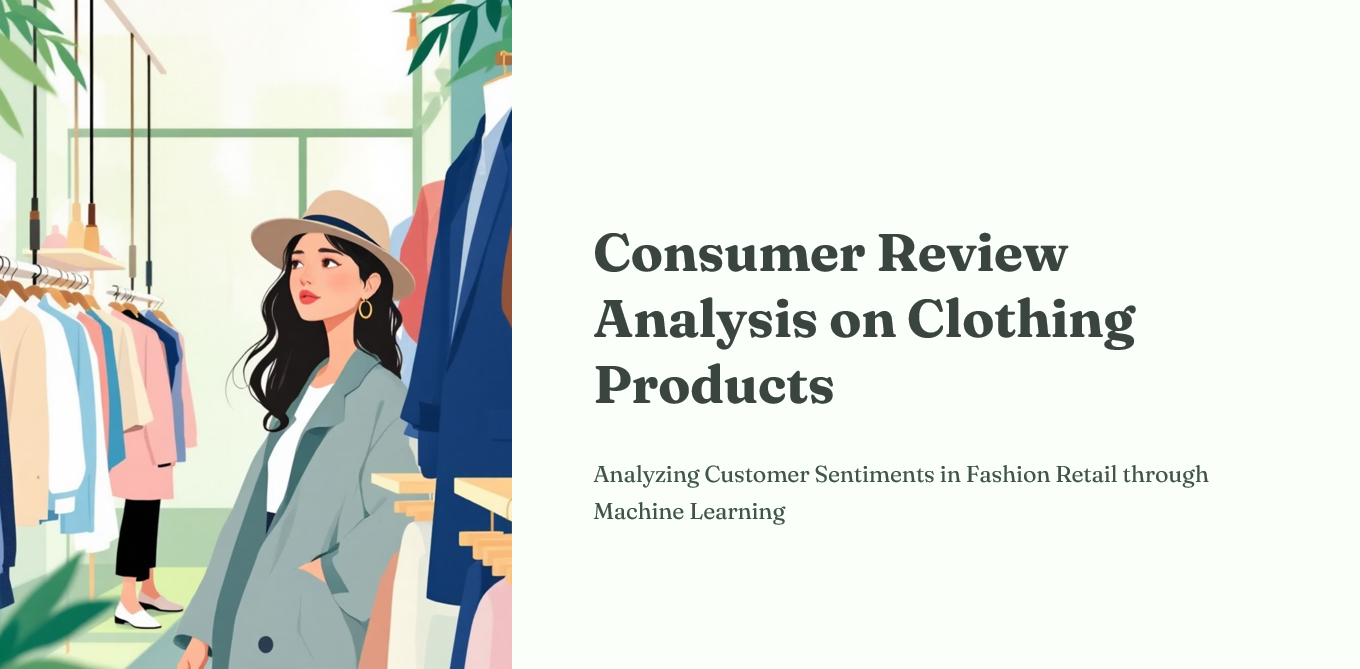

# Consumer Review Analysis on Clothing Products
## Group 01
## Members:
*   EG/2020/4333 - Shahmi A.J.A
*   EG/2020/4041 - Laksayan T


_______________________________________________________________________________________________________________

## 01) Introduction

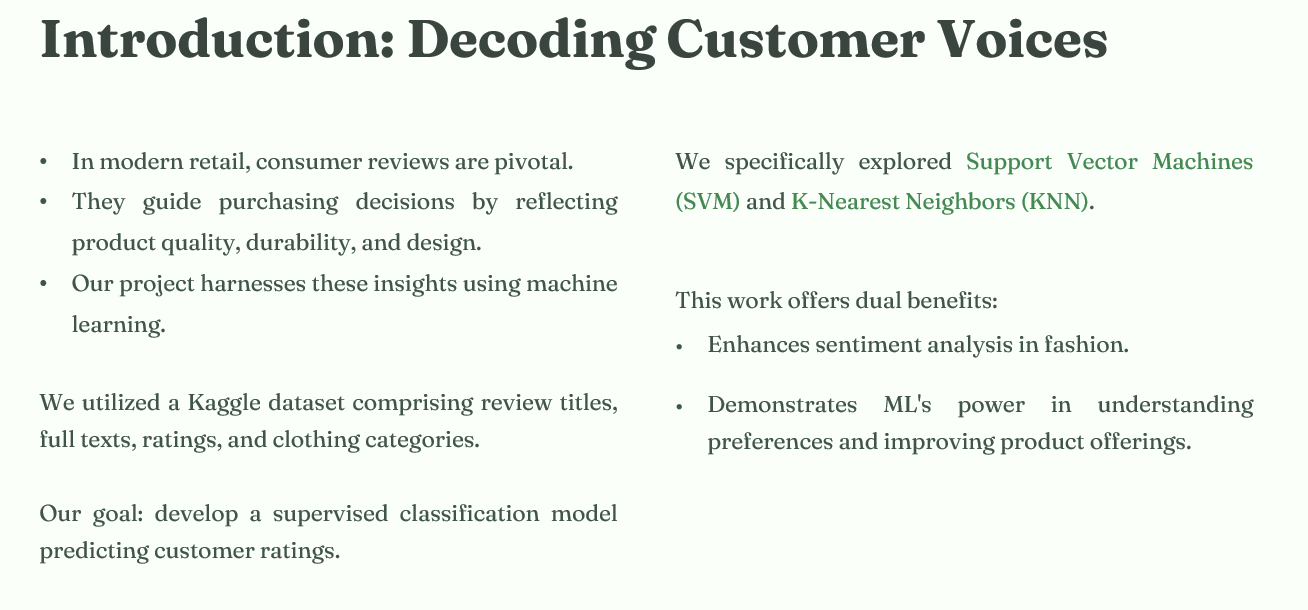

### Our project focuses on analyzing consumer reviews of clothing products using machine learning techniques. The dataset, sourced from Kaggle, contains detailed customer insights, including review titles, full reviews, ratings, clothing categories, material types, construction quality, color, finishing, and durability.

### The primary goal of this project is to develop a supervised classification model to predict customer ratings based on these features. By leveraging Support Vector Machines (SVM) and K-Nearest Neighbours (KNN) algorithms, we aim to extract meaningful patterns from the reviews and enhance the accuracy of rating predictions.

### This project not only contributes to the field of sentiment analysis in fashion retail but also showcases the power of machine learning in understanding consumer preferences and improving product offerings.

_______________________________________________________________________________________________________________

## 02) Literature Survey

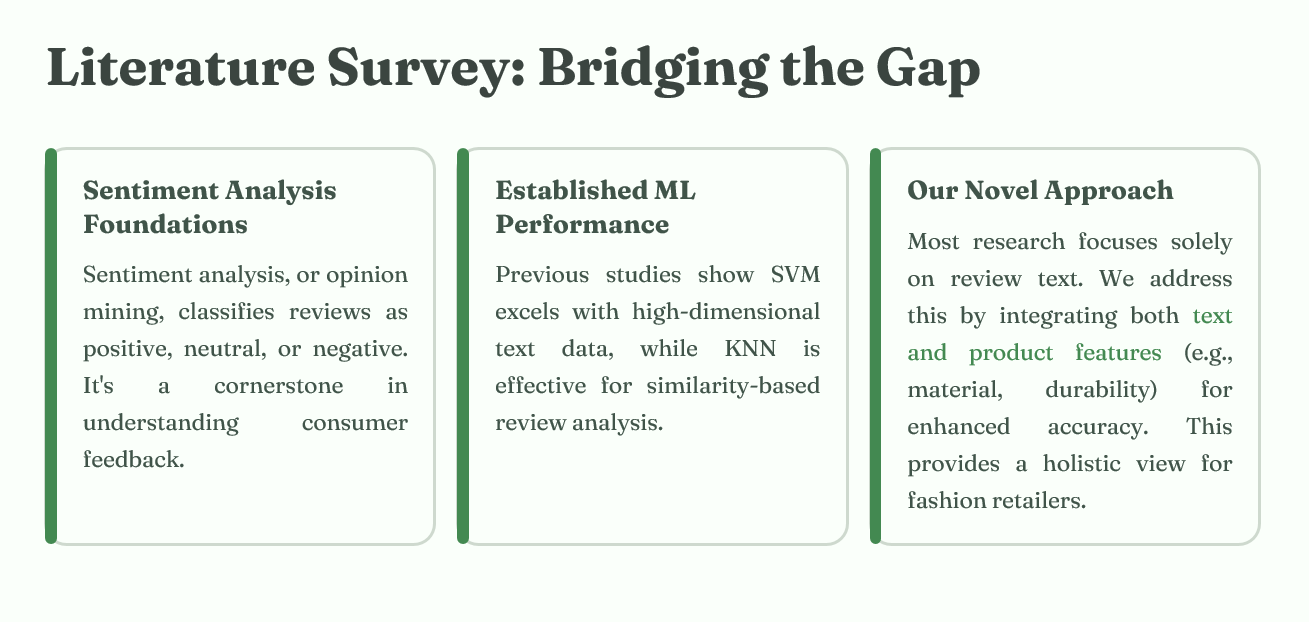

### Online reviews have become an important source of information for customers and retailers. They provide insights into product quality, design, and customer satisfaction. Since the number of reviews is very large, machine learning techniques are widely used to analyze them.

### Sentiment analysis, or opinion mining, helps in understanding whether reviews are positive, negative, or neutral. Studies have shown that algorithms like Support Vector Machines (SVM) and K-Nearest Neighbours (KNN) work well for text classification. SVM is effective in handling high-dimensional data, while KNN is simple and useful in finding similarities between reviews.

### Most research focuses only on review text, but adding product-related features such as category, material, and durability can improve prediction accuracy. Previous studies also highlight that online reviews strongly influence consumer purchasing decisions, which makes predicting ratings very valuable.

### This project addresses a gap in research by analyzing clothing product reviews using both text and product features. By applying SVM and KNN, the study aims to predict consumer ratings (1–5) and provide insights that can help fashion retailers improve their products and customer experience.

https://pdfs.semanticscholar.org/36aa/69afa98934c796b4a7bb1a5b5dffdaa29586.pdf

https://www.researchgate.net/publication/385511331_E-commerce-Clothing-Review-Analysis-by-Advanced-ML-Algorithms

_______________________________________________________________________________________________________________

## 03) Dataset Description

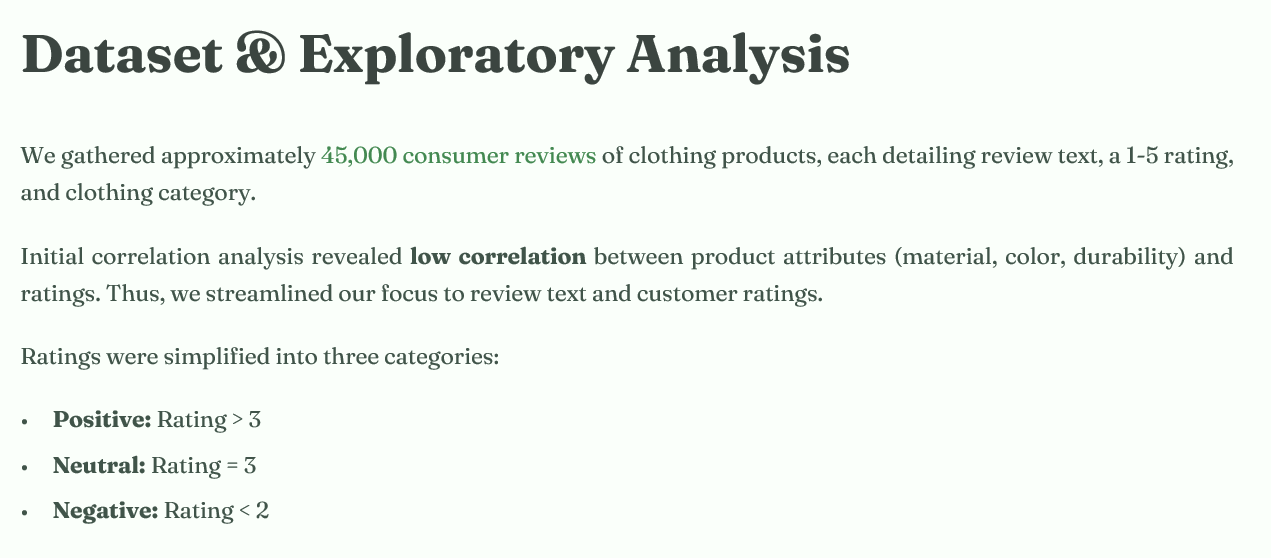

### The dataset is collected on our own from various sources. This dataset comprises a comprehensive collection of reviews pertaining to clothing products and serves as a valuable resource for multilabel classification research. Each data entry is meticulously annotated with relevant labels, allowing researchers to explore various dimensions of the clothing products being reviewed. The dataset offers a rich diversity of perspectives and opinions, enabling the development and evaluation of robust classification models that can accurately predict multiple aspects of a clothing item. With its focus on multilabel classification, this data contributes significantly to advancing the understanding and application of machine learning algorithms in the fashion industry.

https://www.kaggle.com/datasets/jocelyndumlao/consumer-review-of-clothing-product

_______________________________________________________________________________________________________________

## 04) Exploratory Analysis

### Import Libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Import Dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/consumer-review-of-clothing-product")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/consumer-review-of-clothing-product


In [3]:
df = pd.read_csv(os.path.join(path, "Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv"))
print(df.head())

                     Title                                             Review  \
0                      NaN  Absolutely wonderful - silky and sexy and comf...   
1                      NaN  Love this dress!  it's sooo pretty.  i happene...   
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My favorite buy!  I love, love, love this jumpsuit. it's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   

   Cons_rating Cloth_class  Materials  Construction  Color  Finishing  \
0          4.0   Intimates        0.0           0.0    0.0        1.0   
1          5.0     Dresses        0.0           1.0    0.0        0.0   
2          3.0     Dresses        0.0           0.0    0.0        1.0   
3          5.0       Pants        0.0           0.0    0.0        0.0   
4          5.0     Blouses        0.0           1.0    0.0        0.0   

   Durability  
0         0.0  
1         0.0  
2         0.0  
3         

In [4]:
df.shape  # Analyse the rows and columns

(49338, 9)

In [5]:
df.info() # Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [6]:
df.describe()  # Summarise

,Cons_rating,Materials,Construction,Color,Finishing,Durability
count,49124.000000,5741.000000,5743.000000,5742.000000,5737.000000,5734.000000
mean,4.099463,0.306567,0.504092,0.259840,0.265818,0.214161
std,1.283707,0.474515,0.500375,0.452657,0.441807,0.425305
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,9.000000,2.000000,9.000000,1.000000,9.000000


In [7]:
df.isnull().sum() # Missing Values

,0
Title,3968
Review,831
Cons_rating,214
Cloth_class,16
Materials,43597
Construction,43595
Color,43596
Finishing,43601
Durability,43604


In [8]:
# display all the columns
df.columns

Index(['Title', 'Review', 'Cons_rating', 'Cloth_class', 'Materials',
       'Construction', 'Color', 'Finishing', 'Durability'],
      dtype='object')

In [9]:
# counting different values in rating
df['Cons_rating'].value_counts()

,count
Cons_rating,
5.0,28359
4.0,8267
3.0,5350
1.0,3827
2.0,3321


_______________________________________________________________________________________________________________

## 05) Data Preprocessing

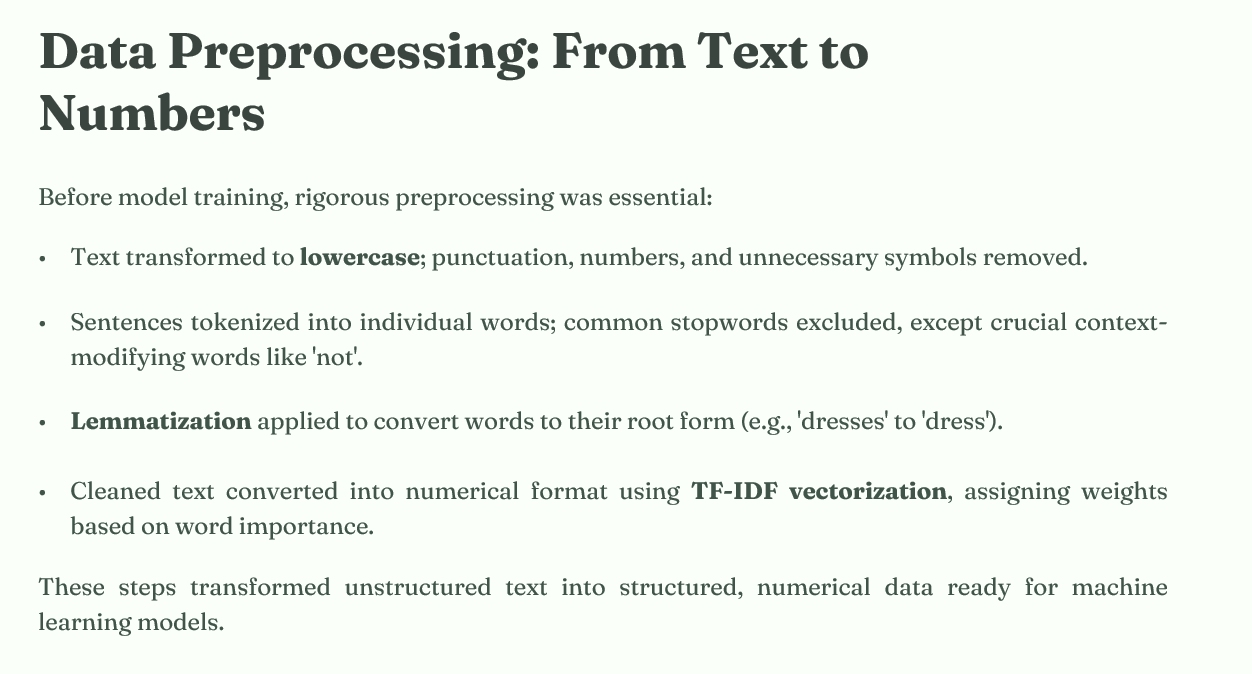

### Handling NullValues

In [10]:
#finding the correlation between numerical features
df[[ 'Cons_rating', 'Materials','Construction', 'Color', 'Finishing', 'Durability']].corr()

,Cons_rating,Materials,Construction,Color,Finishing,Durability
Cons_rating,1.000000,0.012183,0.134932,0.119464,0.205068,-0.380981
Materials,0.012183,1.000000,-0.049311,0.100083,0.039825,0.001718
Construction,0.134932,-0.049311,1.000000,-0.098163,-0.049273,-0.307655
Color,0.119464,0.100083,-0.098163,1.000000,0.033431,-0.037341
Finishing,0.205068,0.039825,-0.049273,0.033431,1.000000,-0.076551
Durability,-0.380981,0.001718,-0.307655,-0.037341,-0.076551,1.000000


In [11]:
# here we can see that the correlation for between Cons_rating and other variable. those are not a strong correlation
# therefore we can drop those columns


columns_to_drop = ['Materials', 'Construction', 'Color', 'Finishing', 'Durability']
df = df.drop(columns=columns_to_drop)


In [12]:
df.head()

,Title,Review,Cons_rating,Cloth_class
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses


In [13]:
# sum of the missing values
df.isnull().sum()

,0
Title,3968
Review,831
Cons_rating,214
Cloth_class,16


<Axes: >

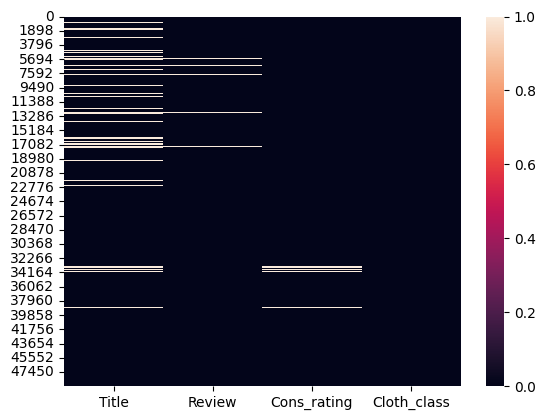

In [14]:
#plotting the heatmap. white color defines the nul values
sns.heatmap(data=df.isnull())

In [15]:
# dropping the missing values because missing values are small compared to the dataset
df = df.dropna()

<Axes: >

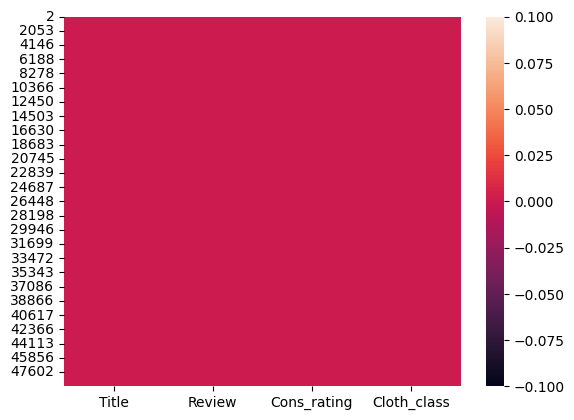

In [16]:
# plotting the heatmap again. here we can see that there is no null values
sns.heatmap(data=df.isnull())

In [17]:
df.isnull().sum()

,0
Title,0
Review,0
Cons_rating,0
Cloth_class,0


In [18]:
df.shape

(45308, 4)

In [19]:
df.describe()

,Cons_rating
count,45308.000000
mean,4.086541
std,1.296556
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
df['Cons_rating'].value_counts()

,count
Cons_rating,
5.0,26097
4.0,7483
3.0,4947
1.0,3667
2.0,3114


In [21]:
df['Cloth_class'].value_counts()

,count
Cloth_class,
Dresses,7639
Blouses,5042
Knits,3981
Jeans,3772
Sweaters,3638
Pants,3436
Jackets,3114
Shorts,3021
Sleep,2722


In [22]:
# as we are interested in review and ratings we can drop cloth_class and Title
df=df.drop(columns=['Title','Cloth_class'])

In [23]:
df.head()

,Review,Cons_rating
2,I had such high hopes for this dress and reall...,3.0
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0
4,This shirt is very flattering to all due to th...,5.0
5,"I love tracy reese dresses, but this one is no...",2.0
6,I aded this in my basket at hte last mintue to...,5.0


### Data Cleaning

In [ ]:
# Import nltk for text preprocessing
import nltk

# Download necessary NLTK resources:
nltk.download('wordnet')        # WordNet corpus for lemmatization
nltk.download('stopwords')      # Common stopwords (e.g., 'the', 'is', 'and')
nltk.download('punkt_tab')          # Pre-trained tokenizer models

# Import stopwords, tokenizer, and lemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# # Install gensim (topic modeling, word embeddings, etc.)
# !pip install gensim

# # Import gensim after installation
# import gensim

# Import additional utilities for text cleaning
import string   # to remove punctuation
import re       # to handle regular expressions (remove unwanted characters)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [25]:
# 1. convert all the words into lowercase and removing punctuations
def clean_data1(text):
  text = [word.lower() for word in text]
  no_punct=[letter for letter in text if letter not in string.punctuation]
  words_wo_punct=''.join(no_punct)
  return words_wo_punct
df['cleaned_review_1']=df['Review'].apply(lambda x: clean_data1(x))
df.head()

,Review,Cons_rating,cleaned_review_1
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...


In [26]:
# 2. removing unnecessary letters and brackets
def clean_data2(text):
  text = [re.sub(r"[0-9]", "",words) for words in text]             #removing numbers
  text = [re.sub(r"(\(.*\))|(\[.*\])", "",words) for words in text] #removing brackets
  text = [re.sub(r"[^\w\s]", "", words) for words in text]          #removing symbols
  text = ''.join(text)
  return text

df['cleaned_review_2']=df['cleaned_review_1'].apply(lambda x: clean_data2(x))
df.head()

,Review,Cons_rating,cleaned_review_1,cleaned_review_2
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...,i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...


In [27]:
# 3. tokenize the strings (splitting the string into words) and removing stop words (is, are, therefore ....)

def clean_data3(text):
  STOPWORDS = set(stopwords.words('english'))
  STOPWORDS.remove('not')                           # because "not" word is used for showing the dislikes
  tokenized = word_tokenize(text)                   # also we can use tokenized=re.split("\W+",text)
  cleaned_wo_sw = [word for word in tokenized if word not in STOPWORDS]
  return cleaned_wo_sw

df['cleaned_review_3']=df['cleaned_review_2'].apply(lambda x: clean_data3(x))
df.head()

,Review,Cons_rating,cleaned_review_1,cleaned_review_2,cleaned_review_3
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti..."
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...,i love tracy reese dresses but this one is not...,"[love, tracy, reese, dresses, one, not, petite..."
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...,"[aded, basket, hte, last, mintue, see, would, ..."


In [28]:
# 4.Lemmatization (converts the words into base form eg: believes -> belief)
def clean_data4(text):
  lemmatizer = WordNetLemmatizer()
  lemmatized_data = [lemmatizer.lemmatize(word) for word in text]
  return lemmatized_data

df['cleaned_review_4']=df['cleaned_review_3'].apply(lambda x: clean_data4(x))
df.head()

,Review,Cons_rating,cleaned_review_1,cleaned_review_2,cleaned_review_3,cleaned_review_4
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti..."
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...,i love tracy reese dresses but this one is not...,"[love, tracy, reese, dresses, one, not, petite...","[love, tracy, reese, dress, one, not, petite, ..."
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...,"[aded, basket, hte, last, mintue, see, would, ...","[aded, basket, hte, last, mintue, see, would, ..."


In [29]:
# cleaned_review4 column is replaced the review
df['Review']=df['cleaned_review_4']

In [30]:
df=df.drop(columns=['cleaned_review_1','cleaned_review_2','cleaned_review_3','cleaned_review_4'])
df.head()

,Review,Cons_rating
2,"[high, hope, dress, really, wanted, work, init...",3.0
3,"[love, love, love, jumpsuit, fun, flirty, fabu...",5.0
4,"[shirt, flattering, due, adjustable, front, ti...",5.0
5,"[love, tracy, reese, dress, one, not, petite, ...",2.0
6,"[aded, basket, hte, last, mintue, see, would, ...",5.0


In [31]:
def categorize_rating(rating):
    if rating > 3:
        return 'Positive'
    elif rating < 2 :
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorize_rating function to categorize the rating as negative(1,2),positive(3,4),and neutral(3)
df['Cons_rating'] = df['Cons_rating'].apply(lambda x: categorize_rating(x))

In [32]:
# we have to joined the words as sentences because vectorization cannot be done with the array of words
df['Review'] = [' '.join(text) for text in df['Review'] ]

In [33]:
df.head()

,Review,Cons_rating
2,high hope dress really wanted work initially o...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
5,love tracy reese dress one not petite foot tal...,Neutral
6,aded basket hte last mintue see would look lik...,Positive


In [34]:
#making copies of df
df2 = df.copy()
df3 = df.copy()

_______________________________________________________________________________________________________________

## 06) Model Implementation

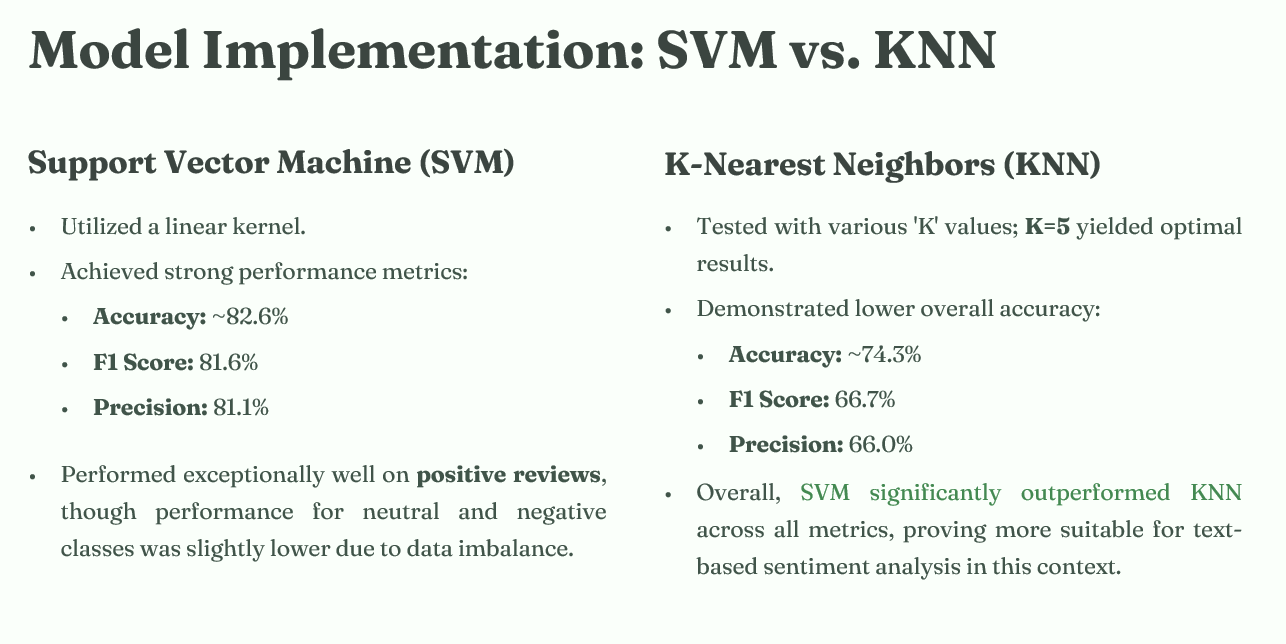

#### Using td idf vectorization.

In [35]:
# tf idf vectorizing . this converts the words into binary values
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [36]:
X = df['Review']
Y = df['Cons_rating']

In [37]:
from sklearn.model_selection import train_test_split

# spliytting the dataset. 80 % for training and others for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (36246,)
Size of y_train: (36246,)
Size of x_test: (9062,)
Size of y_test: (9062,)


In [39]:
# Fit the vectorizer on the training data and transform it into a document-term matrix
x_train = vect.fit_transform(x_train)

# Transform the test data using the same vocabulary (no fitting again!)
x_test = vect.transform(x_test)

### Train SVM and Generate Accuracy

In [40]:
# using svm to train the model
from sklearn import svm
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
# Perform classification with SVM, kernel=linear

classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(x_train, y_train)

prediction_linear = classifier_linear.predict(x_test)

report = classification_report(y_test, prediction_linear, output_dict=True)

# Extract Accuracy F1 score and precision from the classification report
accuracy = report['accuracy']
f1_score = report['weighted avg']['f1-score']
precision = report['weighted avg']['precision']

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)

Accuracy: 0.8266387111013022
F1 Score: 0.8161258240413571
Precision: 0.8112359550192111


In [41]:
# Print the number (or score) of positive sentiments from the report
print('Positive: ', report['Positive'])

# Print the number (or score) of negative sentiments from the report
print('Negative: ', report['Negative'])

# Print the number (or score) of neutral sentiments from the report
print('Neutral: ', report['Neutral'])

Positive:  {'precision': 0.8892580287929125, 'recall': 0.9504364550969078, 'f1-score': 0.9188300078666952, 'support': 6759.0}
Negative:  {'precision': 0.608, 'recall': 0.41530054644808745, 'f1-score': 0.4935064935064935, 'support': 732.0}
Neutral:  {'precision': 0.570254110612855, 'recall': 0.4856779121578612, 'f1-score': 0.5245788930904091, 'support': 1571.0}


### Train KNN and Generate Accuracy

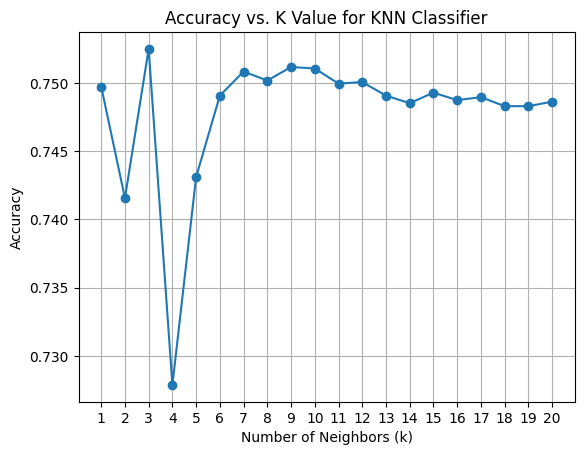

In [42]:
# using knn
from sklearn.neighbors import KNeighborsClassifier

# for finding the optimal k value this graph is plotted
k_values = np.arange(1, 21)

# Initialize an empty list to store accuracy scores for each k
accuracy_scores = []

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)

    # Make predictions on the test set
    predictions = knn_classifier.predict(x_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value for KNN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# using knn
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)

predictions = knn_classifier.predict(x_test)

Accuracy: 0.7431030677554624


In [49]:
report2 = classification_report(y_test, predictions, output_dict=True)
# Extract Accuracy F1 score and precision from the classification report
accuracy2 = report2['accuracy']
f1_score2 = report2['weighted avg']['f1-score']
precision2 = report2['weighted avg']['precision']

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)

Accuracy: 0.7431030677554624
F1 Score: 0.6674794117105669
Precision: 0.6607074073384134


_______________________________________________________________________________________________________________

## 07) Model Evaluation and Discussion

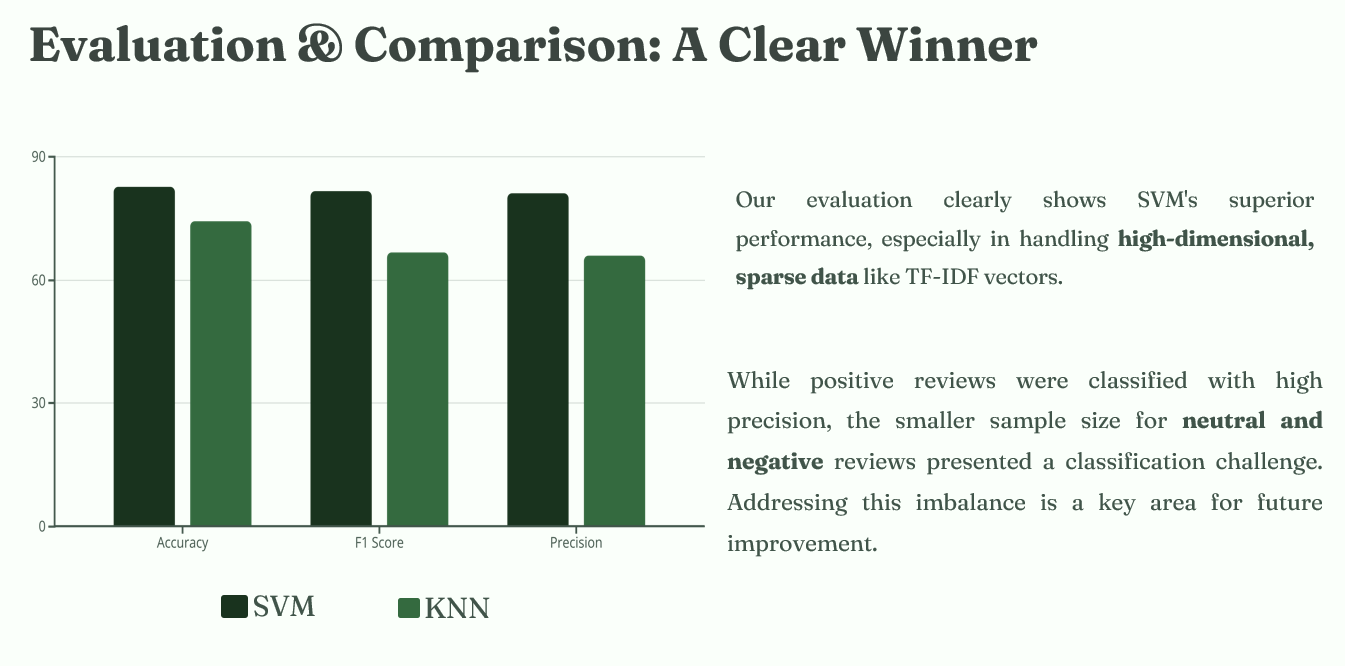

### Accuracy Comparision

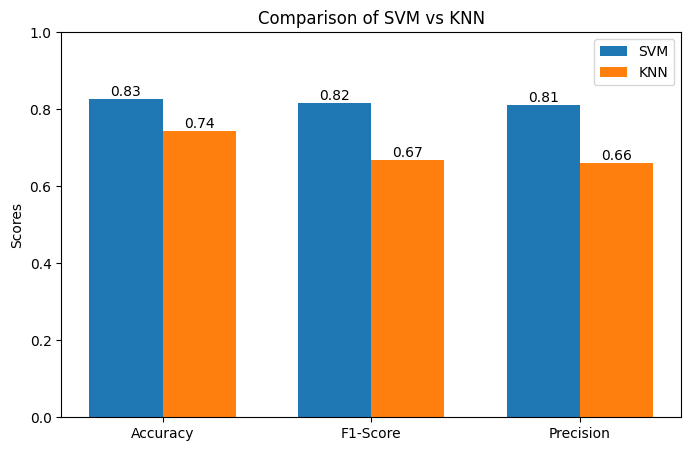

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Calculate metrics
svm_acc = accuracy_score(y_test, prediction_linear)
svm_f1 = f1_score(y_test, prediction_linear, average='weighted')
svm_prec = precision_score(y_test, prediction_linear, average='weighted')

knn_acc = accuracy_score(y_test, predictions)
knn_f1 = f1_score(y_test, predictions, average='weighted')
knn_prec = precision_score(y_test, predictions, average='weighted')

# Prepare data for plotting
metrics = ['Accuracy', 'F1-Score', 'Precision']
svm_scores = [svm_acc, svm_f1, svm_prec]
knn_scores = [knn_acc, knn_f1, knn_prec]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, svm_scores, width, label='SVM')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN')

ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM vs KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.bar_label(rects1, fmt='%.2f')
ax.bar_label(rects2, fmt='%.2f')

plt.ylim(0, 1)
plt.show()

### Predict output with newdata SVM

In [48]:
new_text = ["i like this dress"]

new_text = clean_data1(new_text);
new_text = clean_data2(new_text);
new_text = clean_data3(new_text);
new_text = clean_data4(new_text);
# Transform the new text using the same vectorizer
new_text_vectorized = vect.transform(new_text);

# Use the trained KNN model to predict the category for the new text
predicted_category = classifier_linear.predict(new_text_vectorized)

# Display the predicted category
print("Predicted Category:", predicted_category[0])

Predicted Category: Positive


### Predict output with newdata KNN

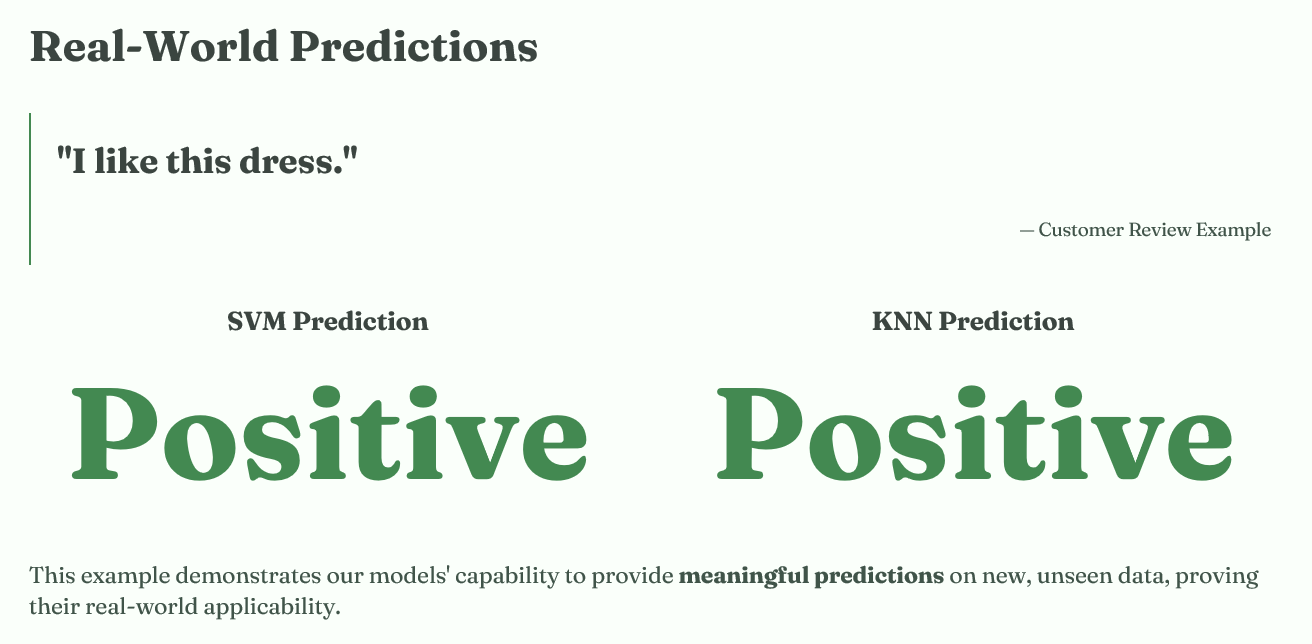

In [44]:
new_text = ["i like this dress"]

new_text = clean_data1(new_text);
new_text = clean_data2(new_text);
new_text = clean_data3(new_text);
new_text = clean_data4(new_text);
# Transform the new text using the same vectorizer
new_text_vectorized = vect.transform(new_text);

# Use the trained KNN model to predict the category for the new text
predicted_category = knn_classifier.predict(new_text_vectorized)

# Display the predicted category
print("Predicted Category:", predicted_category[0])

Predicted Category: Positive


## Discussion

The project aimed to analyze consumer reviews of clothing products and predict ratings using machine learning models. After preprocessing the dataset, Support Vector Machine (SVM) and K-Nearest Neighbors (KNN) were applied for classification.

The results highlight that SVM significantly outperformed KNN in terms of accuracy, precision, and F1-score. SVM achieved an accuracy of 82.6%, while KNN reached 74.3%. The higher performance of SVM can be attributed to its ability to handle high-dimensional feature spaces effectively, which is crucial in text classification tasks where TF-IDF generates sparse and high-dimensional vectors.

Looking at class-wise performance, the models performed very well in identifying positive sentiments, with SVM achieving a precision of 88.9% and recall of 95% for the positive class. However, the accuracy for negative and neutral classes was considerably lower, with F1-scores around 0.49 (negative) and 0.52 (neutral). This imbalance can be linked to the dataset distribution, as positive reviews were far more frequent than negative or neutral ones.

KNN showed decent results but lagged behind SVM, especially for imbalanced classes. Its reliance on distance metrics in high-dimensional spaces likely reduced its effectiveness in this scenario. Nevertheless, the experiment showed that both models could capture useful sentiment patterns, with SVM being more robust overall.

_______________________________________________________________________________________________________________

## 08) Conclusion

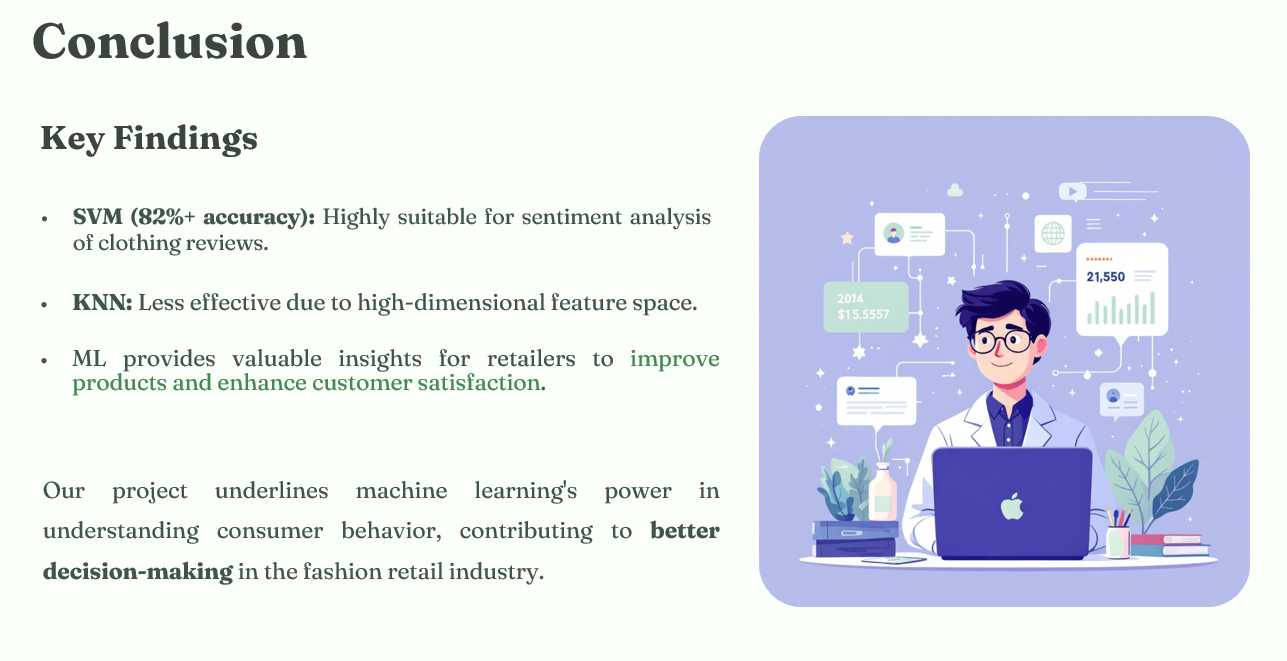

This study demonstrates the effectiveness of machine learning techniques in analyzing consumer reviews of clothing products. The findings show that:

SVM is more suitable for sentiment classification of clothing reviews compared to KNN, achieving higher accuracy (82.6%) and better handling of high-dimensional data.

Positive reviews are classified with high accuracy, but the models struggle with negative and neutral reviews due to class imbalance in the dataset.

Preprocessing steps such as text cleaning, tokenization, stopword removal, and lemmatization significantly improved the quality of the input data and, consequently, the classification performance.

Overall, this project highlights the potential of machine learning in understanding consumer sentiment and providing actionable insights for fashion retailers. By predicting ratings based on reviews, retailers can identify strengths and weaknesses in their products, ultimately improving customer satisfaction and product quality.

_______________________________________________________________________________________________________________

## 09) References

https://pdfs.semanticscholar.org/36aa/69afa98934c796b4a7bb1a5b5dffdaa29586.pdf

https://www.researchgate.net/publication/385511331_E-commerce-Clothing-Review-Analysis-by-Advanced-ML-Algorithms

https://www.kaggle.com/datasets/jocelyndumlao/consumer-review-of-clothing-product